<a href="https://colab.research.google.com/github/2024S-Ajou-ML-pandastic4/whaccent/blob/master/prepare_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("pandastic4.csv")
df

,filename,text,accent,duration
0,output/audio/60/db5a068865f4dda5876d99141950cc...,She suggested one or two suitable people for ...,KR,4.848000
1,output/audio/e4/80e6c776fa511cc3d731954b427969...,The degenerate had fallen into an abyss of ut...,KR,8.325313
2,output/audio/66/f88b90983b9017b24b5aacd1dacbed...,"Ronaldo plays better, runs faster, and shoots...",KR,9.712000
3,output/audio/93/7cd0013dce5616dcaadc481ccb4997...,"Even though you get a blowout, you don’t have...",KR,6.277313
4,output/audio/ee/f0e3df6d6dbed53f5fcc41de42a6f0...,But did you know that ice cream chills most a...,KR,6.874625
...,...,...,...,...
74789,cv-valid-train/sample-176471.mp3,this drafty old barn,southatlandtic,3.984000
74790,cv-valid-train/sample-181488.mp3,i bet you she'd know how to say it all right,southatlandtic,3.696000
74791,cv-valid-train/sample-187716.mp3,the python wasn't a snake it was a programming...,southatlandtic,4.272000
74792,cv-valid-train/sample-188134.mp3,i wouldn't take that too seriously,southatlandtic,3.024000


# 각 accent별 info

In [ ]:
accent_stats = df.groupby('accent')['duration'].agg(['min', 'mean', 'max','count']).reset_index()
print(accent_stats)

            accent       min      mean        max  count
0               KR  2.010625  6.548153  11.726625  11352
1          african  1.416000  4.467313   8.736000   1152
2        australia  1.056000  3.873360   7.728000   4200
3          bermuda  1.896000  4.809000   8.472000    192
4           canada  1.224000  4.249517   8.400000   3829
5          england  0.936000  3.911283   8.184000  14653
6         hongkong  1.344000  3.987537   8.304000     95
7           indian  1.296000  4.055189   8.304000   4409
8          ireland  1.416000  3.811532   7.944000    924
9         malaysia  2.376000  5.097978   9.624000    178
10      newzealand  1.176000  3.861579   7.656000   1140
11     philippines  1.896000  4.819422   9.504000    325
12        scotland  1.224000  3.844281   8.136000   1525
13       singapore  1.896000  5.140293   9.384000    123
14  southatlandtic  1.584000  3.617778   6.216000     81
15              us  0.936000  3.925572   7.968000  30364
16           wales  1.728000  3

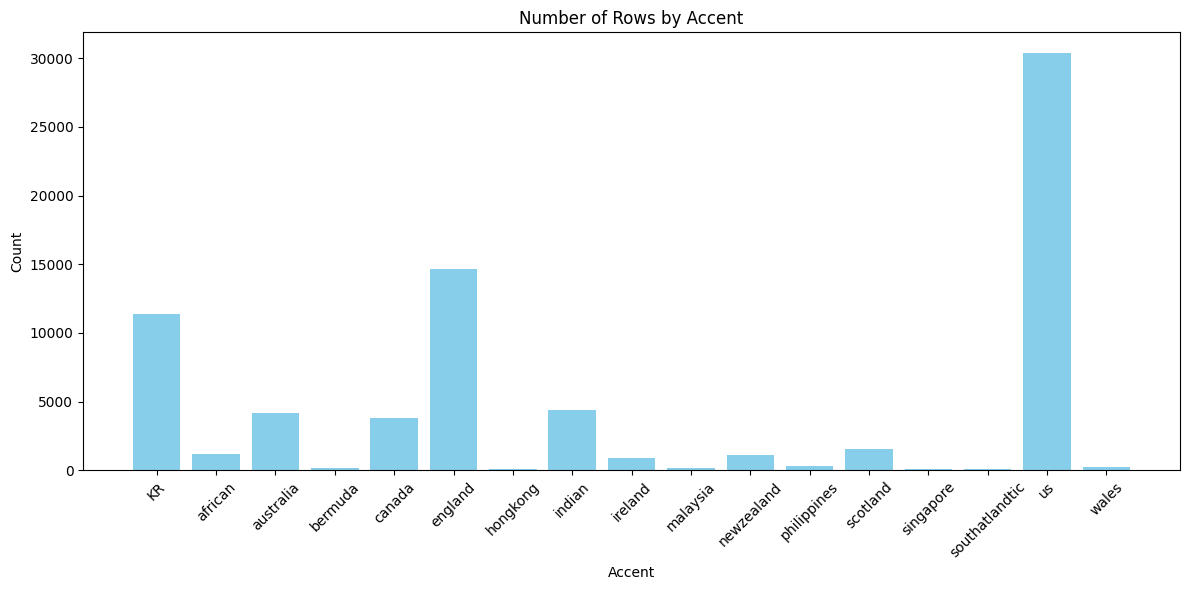

In [ ]:
import matplotlib.pyplot as plt
accents = accent_stats["accent"]
counts = accent_stats["count"]

plt.figure(figsize=(12, 6))
plt.bar(accents, counts, color='skyblue')
plt.xlabel('Accent')
plt.ylabel('Count')
plt.title('Number of Rows by Accent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter
labels = [lang for lang, _ in Counter(df['accent']).most_common(6)]
labels

['us', 'england', 'KR', 'indian', 'australia', 'canada']

In [ ]:
df = df[df['accent'].isin(labels)]
df

,filename,text,accent,duration
0,output/audio/60/db5a068865f4dda5876d99141950cc...,She suggested one or two suitable people for ...,KR,4.848000
1,output/audio/e4/80e6c776fa511cc3d731954b427969...,The degenerate had fallen into an abyss of ut...,KR,8.325313
2,output/audio/66/f88b90983b9017b24b5aacd1dacbed...,"Ronaldo plays better, runs faster, and shoots...",KR,9.712000
3,output/audio/93/7cd0013dce5616dcaadc481ccb4997...,"Even though you get a blowout, you don’t have...",KR,6.277313
4,output/audio/ee/f0e3df6d6dbed53f5fcc41de42a6f0...,But did you know that ice cream chills most a...,KR,6.874625
...,...,...,...,...
68802,cv-valid-train/sample-195357.mp3,something's the matter with the baby,canada,2.328000
68803,cv-valid-train/sample-195413.mp3,caramels are the best,canada,2.568000
68804,cv-valid-train/sample-195476.mp3,she may be lost,canada,2.496000
68805,cv-valid-train/sample-195669.mp3,that's right said the old man able to read the...,canada,4.920000


In [ ]:
accent_stats = df.groupby('accent')['duration'].agg(['min', 'mean', 'max','count']).reset_index()
print(accent_stats)

      accent       min      mean        max  count
0         KR  2.010625  6.548153  11.726625  11352
1  australia  1.056000  3.873360   7.728000   4200
2     canada  1.224000  4.249517   8.400000   3829
3    england  0.936000  3.911283   8.184000  14653
4     indian  1.296000  4.055189   8.304000   4409
5         us  0.936000  3.925572   7.968000  30364


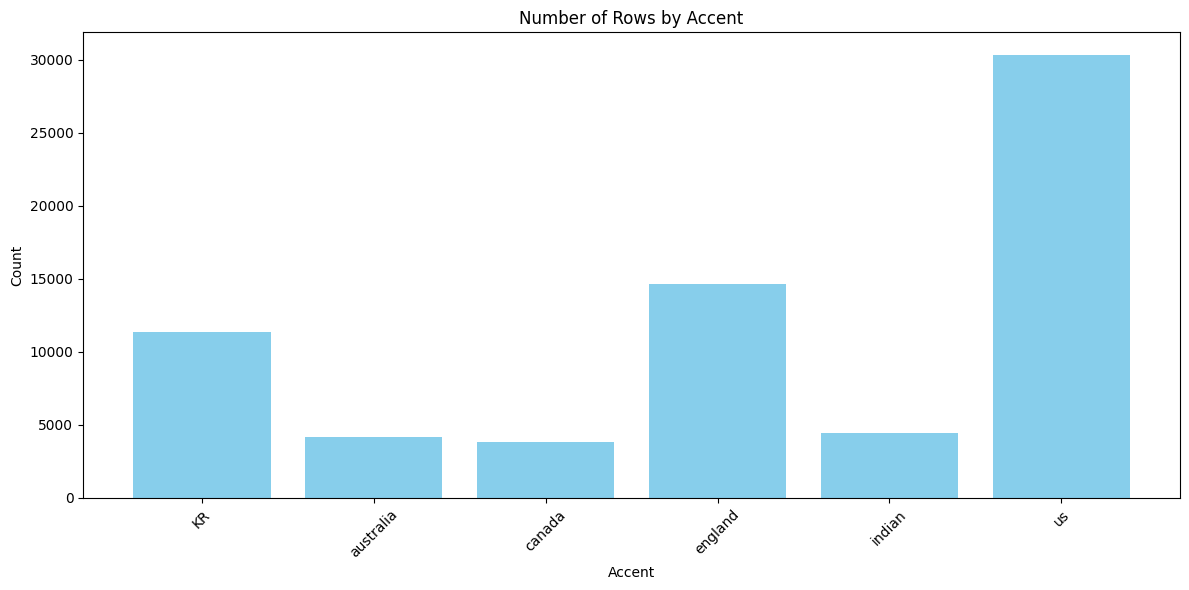

In [ ]:
accents = accent_stats["accent"]
counts = accent_stats["count"]

plt.figure(figsize=(12, 6))
plt.bar(accents, counts, color='skyblue')
plt.xlabel('Accent')
plt.ylabel('Count')
plt.title('Number of Rows by Accent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/z1/gby5gf8s4yzgftnr5r6qcsqh0000gn/T/ipykernel_1707/1862707573.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_range'] = pd.cut(df['duration'], bins=bins, labels=False, right=False)


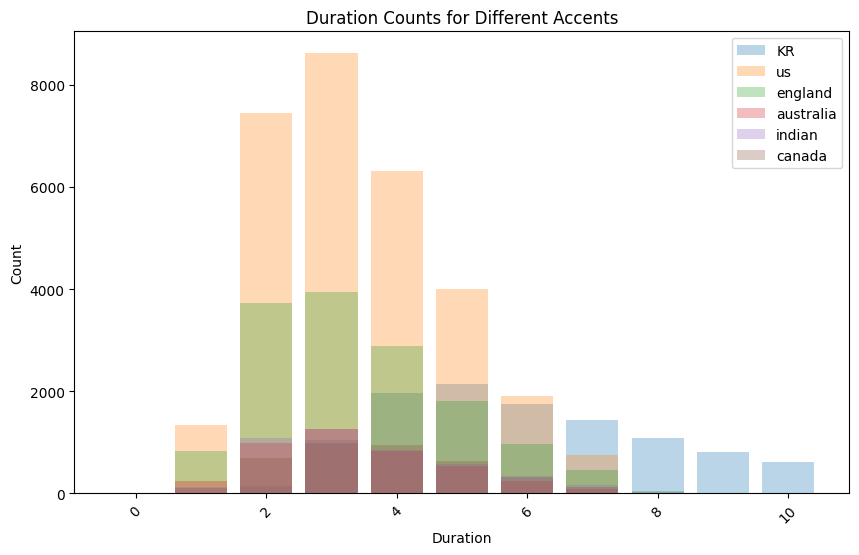

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# duration을 특정 범위로 묶기
bins = [i for i in range(0, int(df['duration'].max()) + 1, 1)]
labels = [f'{i}-{i+1}' for i in range(0, int(df['duration'].max()), 1)]
df['duration_range'] = pd.cut(df['duration'], bins=bins, labels=False, right=False)

# 모든 accent에 대해 막대 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조정

for accent in df['accent'].unique():
#for accent in ["us","england","KR","indian","australia","canada"]:
    # 특정 accent에 해당하는 duration에 대한 count 계산
    accent_counts = df[df['accent'] == accent]['duration_range'].value_counts().sort_index()

    # 범위 라벨 다시 설정
    # accent_counts.index = [labels[int(i)] for i in accent_counts.index]

    # 막대 그래프 그리기
    plt.bar(accent_counts.index, accent_counts.values, label=accent, alpha=0.3)  # 투명도 설정

plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Duration Counts for Different Accents')
plt.xticks(rotation=45)
plt.legend()  # 범례 표시
plt.show()


In [ ]:
df_filtered = df[df['duration'] <= 8]

# 각 accent에 해당하는 무작위 3000개의 데이터 선택
df_sampled = df_filtered.groupby('accent').apply(lambda x: x.sample(n=3000, random_state=42)).reset_index(drop=True)

df_sampled

/var/folders/z1/gby5gf8s4yzgftnr5r6qcsqh0000gn/T/ipykernel_1707/2210288183.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_filtered.groupby('accent').apply(lambda x: x.sample(n=3000, random_state=42)).reset_index(drop=True)


,filename,text,accent,duration,duration_range
0,output/audio/1a/6b6bac588f825569bd63bc8dec2663...,Watching a movie or TV drama with the English...,KR,6.192000,6-7
1,output/audio/74/8db98b2ca61d0445313179d3fd6e68...,I prefer to go to school rather than go to th...,KR,6.128000,6-7
2,output/audio/06/cb126c861433a05df8fb3f2cd9d022...,Your handwriting is impossible to read.,KR,3.930625,3-4
3,output/audio/d5/ce98557a3e602b2236906a794b6942...,How high is Mt. Everest?,KR,4.250625,4-5
4,output/audio/0a/ea2a685de364804565f314ec62a05a...,This idea helps them continue to live together.,KR,5.680000,5-6
...,...,...,...,...,...
17995,cv-valid-train/sample-059482.mp3,may i borrow some of your cartoons,us,1.680000,1-2
17996,cv-valid-train/sample-040591.mp3,there were lights in the upper windows of the ...,us,4.944000,4-5
17997,cv-valid-train/sample-195273.mp3,strange images passed through my mind,us,3.144000,3-4
17998,cv-valid-train/sample-013813.mp3,what do you want here today the desert asked him,us,3.576000,3-4


In [ ]:
accent_stats = df_sampled.groupby('accent')['duration'].agg(['min', 'mean', 'max','count']).reset_index()
print(accent_stats)

      accent    min      mean    max  count
0         KR  2.032  5.532015  7.984   3000
1  australia  1.056  3.853136  7.728   3000
2     canada  1.368  4.239200  7.992   3000
3    england  1.224  3.894192  7.992   3000
4     indian  1.296  4.046520  7.944   3000
5         us  1.056  3.912864  7.968   3000


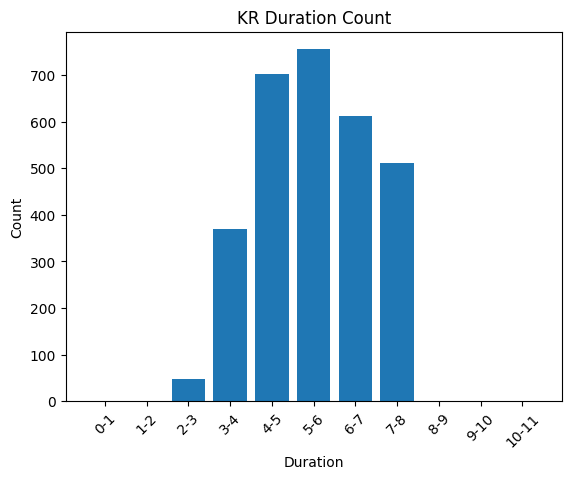

In [ ]:

# 특정 accent에 해당하는 duration에 대한 count 계산
accent_counts = df_sampled[df_sampled['accent'] == 'KR']['duration_range'].value_counts().sort_index()

# 막대 그래프 그리기
plt.bar(accent_counts.index, accent_counts.values)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('KR Duration Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df= df_sampled

In [ ]:
df.groupby('accent')['duration'].agg(['min', 'mean', 'max']).reset_index()

,accent,min,mean,max
0,KR,2.032,5.532015,7.984
1,australia,1.056,3.853136,7.728
2,canada,1.368,4.239200,7.992
3,england,1.224,3.894192,7.992
4,indian,1.296,4.046520,7.944
5,us,1.056,3.912864,7.968


In [ ]:
df= df.drop(columns=["duration_range"])
df

,filename,text,accent,duration
0,output/audio/1a/6b6bac588f825569bd63bc8dec2663...,Watching a movie or TV drama with the English...,KR,6.192000
1,output/audio/74/8db98b2ca61d0445313179d3fd6e68...,I prefer to go to school rather than go to th...,KR,6.128000
2,output/audio/06/cb126c861433a05df8fb3f2cd9d022...,Your handwriting is impossible to read.,KR,3.930625
3,output/audio/d5/ce98557a3e602b2236906a794b6942...,How high is Mt. Everest?,KR,4.250625
4,output/audio/0a/ea2a685de364804565f314ec62a05a...,This idea helps them continue to live together.,KR,5.680000
...,...,...,...,...
17995,cv-valid-train/sample-059482.mp3,may i borrow some of your cartoons,us,1.680000
17996,cv-valid-train/sample-040591.mp3,there were lights in the upper windows of the ...,us,4.944000
17997,cv-valid-train/sample-195273.mp3,strange images passed through my mind,us,3.144000
17998,cv-valid-train/sample-013813.mp3,what do you want here today the desert asked him,us,3.576000


In [ ]:
df.to_csv("preprocessed_csv",index=False)

In [ ]:
import pandas as pd
df = pd.read_csv("preprocessed_csv")
df

,filename,text,accent,duration
0,output/audio/1a/6b6bac588f825569bd63bc8dec2663...,Watching a movie or TV drama with the English...,KR,6.192000
1,output/audio/74/8db98b2ca61d0445313179d3fd6e68...,I prefer to go to school rather than go to th...,KR,6.128000
2,output/audio/06/cb126c861433a05df8fb3f2cd9d022...,Your handwriting is impossible to read.,KR,3.930625
3,output/audio/d5/ce98557a3e602b2236906a794b6942...,How high is Mt. Everest?,KR,4.250625
4,output/audio/0a/ea2a685de364804565f314ec62a05a...,This idea helps them continue to live together.,KR,5.680000
...,...,...,...,...
17995,cv-valid-train/sample-059482.mp3,may i borrow some of your cartoons,us,1.680000
17996,cv-valid-train/sample-040591.mp3,there were lights in the upper windows of the ...,us,4.944000
17997,cv-valid-train/sample-195273.mp3,strange images passed through my mind,us,3.144000
17998,cv-valid-train/sample-013813.mp3,what do you want here today the desert asked him,us,3.576000


In [ ]:
labels_list = ['KR','us', 'england', 'indian', 'australia', 'canada']
labels_list

['KR', 'us', 'england', 'indian', 'australia', 'canada']

In [ ]:
# Initialize empty dictionaries to map labels to IDs and vice versa
label2id, id2label = dict(), dict()

# Iterate over the unique labels and assign each label an ID, and vice versa
for i, label in enumerate(labels_list):
    label2id[label] = i  # Map the label to its corresponding ID
    id2label[i] = label  # Map the ID to its corresponding label

# Print the resulting dictionaries for reference
print("Mapping of IDs to Labels:", id2label, '\n')
print("Mapping of Labels to IDs:", label2id)

Mapping of IDs to Labels: {0: 'KR', 1: 'us', 2: 'england', 3: 'indian', 4: 'australia', 5: 'canada'} 

Mapping of Labels to IDs: {'KR': 0, 'us': 1, 'england': 2, 'indian': 3, 'australia': 4, 'canada': 5}


In [ ]:
"""# Creating classlabels to match labels to IDs
ClassLabels = ClassLabel(num_classes=len(labels_list), names=labels_list)

# Mapping labels to IDs
def map_label2id(example):
    example['label'] = ClassLabels.str2int(example['label'])
    return example

dataset = dataset.map(map_label2id, batched=True)

# Casting label column to ClassLabel Object
dataset = dataset.cast_column('label', ClassLabels)"""

In [ ]:
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict, Audio

train_df, valid_test_df = train_test_split(df, test_size=0.3, random_state=42)
valid_df, test_df = train_test_split(valid_test_df, test_size=0.33, random_state=42)

train_dataset= Dataset.from_pandas(train_df)
valid_dataset = Dataset.from_pandas(valid_df)
test_dataset = Dataset.from_pandas(test_df)

dataset_dict = DatasetDict({
    "train" : train_dataset,
    "validatoin" : valid_dataset,
    "test" : test_dataset
})

In [ ]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['filename', 'text', 'accent', 'duration', '__index_level_0__'],
        num_rows: 12600
    })
    validatoin: Dataset({
        features: ['filename', 'text', 'accent', 'duration', '__index_level_0__'],
        num_rows: 3618
    })
    test: Dataset({
        features: ['filename', 'text', 'accent', 'duration', '__index_level_0__'],
        num_rows: 1782
    })
})

In [ ]:
dataset_dict["train"][0]

{'filename': 'cv-valid-train/sample-086904.mp3',
 'text': 'so how will we name all these hurricanes',
 'accent': 'australia',
 'duration': 3.504,
 '__index_level_0__': 5553}

In [ ]:
import librosa
import soundfile

In [ ]:
dataset_dict = dataset_dict.cast_column("filename", Audio())

In [ ]:
dataset_dict["train"][0]

{'filename': {'path': 'cv-valid-train/sample-086904.mp3',
  'array': array([ 0.00000000e+00, -8.35234795e-15, -7.95494126e-15, ...,
          3.18145794e-07,  1.51354584e-06, -1.63861614e-07]),
  'sampling_rate': 48000},
 'text': 'so how will we name all these hurricanes',
 'accent': 'australia',
 'duration': 3.504,
 '__index_level_0__': 5553}

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
dataset_dict.push_to_hub(repo_id="iisking/waccent")

Uploading the dataset shards:   0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/6300 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/63 [00:00<?, ?ba/s]

Map:   0%|          | 0/6300 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/63 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/3618 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/37 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1782 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/18 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/635 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/iisking/waccent/commit/7455ec796b4c6e52dff27a5e56c8ab6d35d3cf64', commit_message='Upload dataset', commit_description='', oid='7455ec796b4c6e52dff27a5e56c8ab6d35d3cf64', pr_url=None, pr_revision=None, pr_num=None)